# **Solution to PSet 4**

> provided and graded by Andy Chu

[:material-download: Download this notebook](./sol4.ipynb)

In [77]:
# Import required libraries
import numpy as np
from math import ceil
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from datetime import datetime
from pytz import timezone

# Install and import QuTiP if needed
try:
    from qutip import *
except ImportError:
    %pip install qutip
    from qutip import *

# Configure matplotlib for LaTeX rendering
plt.rcParams.update(
    {
        "text.usetex": True,
        "text.latex.preamble": r"\usepackage{amsmath} \usepackage{physics}",
        "font.family": "serif",
    }
)
%config InlineBackend.figure_format = 'svg'

# Print version and execution time info
print(f"QuTiP version: {qutip.__version__}")
print(
    "Time of execution: ",
    datetime.now(timezone("America/Chicago")).strftime("%Y-%m-%d %H:%M:%S"),
)

QuTiP version: 5.1.1
Time of execution:  2025-04-18 00:23:14


## **Problem 4-1 [5 points]** 

Warm-up: Double quantum dot, exchange interaction

### **a.  [5 points]**  
Show that the exchange interaction $J$ that splits the singlet $S_{(1,1)}$ from the triplet states $T^+_{(1,1)}$, $T^0_{(1,1)}$, $T^-_{(1,1)}$  results in the same Hamiltonian as

$$
\mathcal{H} = J \vec{S}_1 \cdot \vec{S}_2,
$$

up to a global phase.  *(A global phase takes the form of $c \mathbb{1}$, for some constant $c$ and identity operator $\mathbb{1}$.)*

---


For the derivation, we start from the energy splitting between the
triplet manifold and the singlet in order to arrive at the familiar
spin–exchange‑coupling form.

$$
\begin{aligned}
\underline{T^-_{(1,1)}} \qquad
&\underline{T^0_{(1,1)}} \qquad
\underline{T^+_{(1,1)}} \\[4pt]
&\;\downarrow\; J \\[2pt]
&\underline{S_{(1,1)}}
\end{aligned}
$$

Now we can represent the Hamiltonian as an energy offset for the singlet state:


$$
\begin{aligned}
\tilde{\mathcal{H}}
    &= -J\,|S\rangle\langle S| \\[6pt]
    &= -J\,\frac{1}{2}\Bigl(\ket{\uparrow\downarrow} - \ket{\downarrow\uparrow}\Bigr)
        \Bigl(\bra{\uparrow\downarrow} - \bra{\downarrow\uparrow}\Bigr) \\[6pt]
    &= -\frac{J}{2}\Bigl[
        \ket{\uparrow}\!\!\bra{\uparrow} \otimes \ket{\downarrow}\!\!\bra{\downarrow}
        - \ket{\downarrow}\!\!\bra{\uparrow} \otimes \ket{\uparrow}\!\!\bra{\downarrow}
        - \ket{\uparrow}\!\!\bra{\downarrow} \otimes \ket{\downarrow}\!\!\bra{\uparrow}
        + \ket{\downarrow}\!\!\bra{\downarrow} \otimes \ket{\uparrow}\!\!\bra{\uparrow}
        \Bigr] \\[6pt]
    &= -\frac{J}{2}\Bigl[
          \bigl(\tfrac12+S_1^{z}\bigr)\bigl(\tfrac12-S_2^{z}\bigr)
        \;-\;\bigl(S_1^{x}-iS_1^{y}\bigr)\bigl(S_2^{x}+iS_2^{y}\bigr) \\[2pt]
        &\qquad\qquad
        -\bigl(S_1^{x}+iS_1^{y}\bigr)\bigl(S_2^{x}-iS_2^{y}\bigr)
        +\bigl(\tfrac12-S_1^{z}\bigr)\bigl(\tfrac12+S_2^{z}\bigr)
        \Bigr] \\[8pt]
    &= -\frac{J}{2}\Bigl[
        (-2)\bigl(S_1^{x}S_2^{x}+S_1^{y}S_2^{y}+S_1^{z}S_2^{z}\bigr)
        +\tfrac12
        \Bigr] \\[8pt]
    &= J\Bigl[\,
        \vec{S}_{1}\!\cdot\!\vec{S}_{2}-\tfrac14
        \Bigr].
\end{aligned}
$$

Here the $-\tfrac{J}{4}$ term is a constant offset that can be treated as a global phase.

Similarly, we can represent the Hamiltonian as an energy offset for the three triplet states.

## **Problem 4-2 [20 points]** 

Resonantly driven CNOT gate for electron spins

In this problem, we will study a cutting-edge experiment using silicon quantum dots that have much longer coherence times than GaAs. The paper is:

-  D. M. Zajac et al. (Petta group): *Resonantly driven CNOT gate for electron spins*, *Science* **359**, 439-442 (2018).


### **a. [5 points]**  

Let’s start with **Figure 1**. What is the procedure for initializing the system into $\ket{\downarrow\downarrow}$?  To illustrate your explanation, draw a pair of plots showing the important gate voltages ($V_L$ and $V_R$) vs. time during the initialization sequence.  Then do the same for the measurement sequence.  *(To get reasonable timescales it may help to look at Fig. S3.)*

---

The initialization procedure starts with empty dots (a). Then, an electron is loaded into the right dot by lowering $V_R$ (b). Next, an electron is loaded into the left dot by lowering $V_L$ (&#8203;c). The system is held in the (1,1) configuration for manipulation (d).

For measurement, the procedure is reversed. First, the left electron tunnels out by raising $V_L$ (e), followed by emptying the left dot (f). Then, the right electron tunnels out by raising $V_R$ (g), returning to the empty state (a). Spin-to-charge conversion happens during the tunneling out steps (e and g), allowing measurement based on whether tunneling occurs.

The timescale is in milliseconds (ms). According to Fig. S3:
- Right tunnel in time (b): ~0.5 ms
- Left tunnel in time (&#8203;c): ~0.5 ms
- Left tunnel out time (e): ~1.5 ms
- Right tunnel out time (g): ~0.5 ms
Other steps (d, f, a) are assumed based on the visual representation.

![](assets/sol4_01.png)

### **b. [5 points]**  

**Figure 2** shows single-qubit $X$ rotations on both qubits, driven by microwaves to the gate $S$ at frequencies around 18 GHz (Larmor frequency of the spins).  

#### **(i)**  

The gate $S$ is coupled to both dots, so how are the authors able to separately drive the left and right spins?

---

- The authors use a micromagnet to create a B-field gradient. This gradient causes the two spatially separated qubits to have different resonant frequencies due to the Zeeman splitting. (From Fig 2A, the left qubit frequency $f^L \approx 18.298$ GHz and the right qubit frequency $f^R \approx 18.493$ GHz).
  
- By driving the gate $S$ with a microwave frequency that matches either $f^L$ or $f^R$, they can selectively address and control each qubit individually, achieving single-qubit control despite the shared gate.

#### **(ii)**  

The authors claim that it is the electric field from the $S$ gate that drives the qubit rotations.  Why does this work (*section 3 of supplement may be helpful*)?  What parameter(s) determine the ratio of the electric field $E$ to the spin rotation (Rabi) frequency $\Omega$?

---

- The oscillating electric field $E(t) = E_0 \cos(2\pi f t)$ applied via gate $S$ causes the electron's position $z(t)$ to oscillate in the $\hat{z}$ direction.
  
- Due to the magnetic field gradient $\frac{dB_y}{dz}$ created by the micromagnet, this position oscillation translates into an oscillating effective magnetic field $B_y(t)$ experienced by the electron spin.
  
- This oscillating magnetic field $B_y(t)$ is perpendicular to the main quantization axis ($B_z$) and drives resonant spin rotations (ESR - Electron Spin Resonance).

**Hand-wavy derivation:**

From Newton's Second Law for the electron's motion in the $z$ direction driven by the E-field:

$$
m \ddot{z} = e E(t) = e E_0 \cos(2\pi f t)
$$

Integrating twice (assuming the electron starts at $z_0$ with zero velocity):

$$
z(t) - z_0 = -\frac{e E_0}{m (2\pi f)^2} \cos(2\pi f t)
$$

The magnetic field experienced by the electron depends on its position $z(t)$. Using a Taylor expansion around $z_0$:

$$
B_y(t) = B_y[z(t)] \approx B_y(z_0) + \frac{dB_y}{dz} \bigg|_{z_0} (z(t) - z_0)
$$

Substituting the expression for $z(t) - z_0$:

$$
B_y(t) \approx B_y(z_0) - \underbrace{\frac{dB_y}{dz} \frac{e E_0}{m (2\pi f)^2}}_{B'_{y, L/R}} \cos(2\pi f t)
$$

The oscillating part $B'_{y, L/R} \cos(2\pi f t)$ drives the spin rotations. The Rabi frequency $\Omega$ is proportional to the amplitude of this driving field:

$$
\Omega \propto g \mu_B B'_{y, L/R} \propto g \mu_B \frac{dB_y}{dz} \frac{e E_0}{m (2\pi f)^2}
$$

*(Note: The exact prefactor depends on conventions and system details, often given as $\Omega = g \mu_B B'_{y, L/R} / (2\hbar)$)*.

Therefore, the ratio of the electric field $E_0$ to the Rabi frequency $\Omega$ is determined by:

- The magnetic field gradient $\frac{dB_y}{dz}$.
- Fundamental constants ($e, m, \mu_B, \hbar$).
- The electron g-factor $g$.
- The driving frequency $f$.

### **c. [5 points]**  

In **Figure 3**, the authors show that they can perform rotations on one qubit conditioned on the state of the other. Let’s understand why that is the case and reason why the level diagram in Fig. 3A is the correct description.

#### **(i)**  

In class we learned that in the (1,1) charge configuration, the **exchange interaction** between the dots shifts the singlet state  $(\ket{\uparrow\downarrow} - \ket{\downarrow\uparrow})/\sqrt{2}$  by the exchange energy $J = 4t_c^2/E_c$ down relative to the triplet states  $\{\ket{\uparrow\uparrow}, (\ket{\uparrow\downarrow} + \ket{\downarrow\uparrow})/ \sqrt{2}, \ket{\downarrow\downarrow} \}$.

Plot the **energies of the four states** as a function of the **magnetic field** ($B_z$), ranging from $B_z = 0$ to $B_z \gg J$.

---

The Hamiltonian including the Zeeman term and the exchange interaction is:

$$
\mathcal{H} = \gamma B_z (S_1^z + S_2^z) + J \vec{S}_1 \cdot \vec{S}_2
$$

where $\gamma$ is the gyromagnetic ratio (assuming $g\mu_B = \gamma$). We use the result from Problem 4-1a that $\vec{S}_1 \cdot \vec{S}_2$ has eigenvalue $1/4$ for triplet states and $-3/4$ for the singlet state. The Zeeman term $S_1^z + S_2^z$ has eigenvalues $S_{tot}^z$.

The energies of the four states are:

- $\ket{\uparrow\uparrow} = \ket{T^+}$: $S_{tot}^z = 1$. Energy $E_{\uparrow\uparrow} = \gamma B_z (1) + J(1/4) = \gamma B_z + J/4$.
- $\ket{T^0} = (\ket{\uparrow\downarrow} + \ket{\downarrow\uparrow})/\sqrt{2}$: $S_{tot}^z = 0$. Energy $E_{T^0} = \gamma B_z (0) + J(1/4) = J/4$.
- $\ket{\downarrow\downarrow} = \ket{T^-}$: $S_{tot}^z = -1$. Energy $E_{\downarrow\downarrow} = \gamma B_z (-1) + J(1/4) = -\gamma B_z + J/4$.
- $\ket{S} = (\ket{\uparrow\downarrow} - \ket{\downarrow\uparrow})/\sqrt{2}$: $S_{tot}^z = 0$. Energy $E_S = \gamma B_z (0) + J(-3/4) = -3J/4$.

Plotting these energies vs. $B_z$:

- At $B_z = 0$, the three triplet states ($\ket{\uparrow\uparrow}, \ket{T^0}, \ket{\downarrow\downarrow}$) are degenerate with energy $J/4$. The singlet state $\ket{S}$ has energy $-3J/4$. The splitting between triplet and singlet is $J$.
  
- As $B_z$ increases:
  
    - $E_{\uparrow\uparrow}$ increases linearly with slope $\gamma$.
    - $E_{T^0}$ remains constant at $J/4$.
    - $E_{\downarrow\downarrow}$ decreases linearly with slope $-\gamma$.
    - $E_S$ remains constant at $-3J/4$.


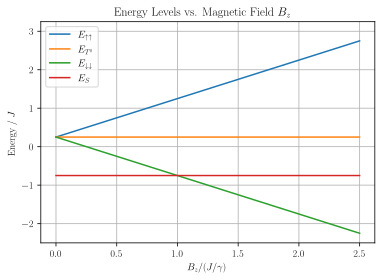

In [78]:
J = 1.0
gamma = 1.0 # Represents g*mu_B / hbar

Bz_max = 2.5 * J / gamma # Plot up to Bz >> J/gamma
Bz_vec = np.linspace(0, Bz_max, 100)

E_upup = gamma * Bz_vec + J/4
E_T0 = np.ones_like(Bz_vec) * J/4
E_dwdw = -gamma * Bz_vec + J/4
E_S = np.ones_like(Bz_vec) * (-3*J/4)

plt.figure(figsize=(6, 4))
plt.plot(Bz_vec / (J/gamma), E_upup / J, label=r'$E_{\uparrow\uparrow}$')
plt.plot(Bz_vec / (J/gamma), E_T0 / J, label=r'$E_{T^0}$')
plt.plot(Bz_vec / (J/gamma), E_dwdw / J, label=r'$E_{\downarrow\downarrow}$')
plt.plot(Bz_vec / (J/gamma), E_S / J, label=r'$E_S$')

plt.xlabel(r'$B_z / (J/\gamma)$')
plt.ylabel(r'Energy / $J$')
plt.title('Energy Levels vs. Magnetic Field $B_z$')
plt.legend()
plt.grid(True)
plt.ylim(E_S[0]/J - 1.75, E_upup[-1]/J + 0.5) # Adjust y-limits for better view
plt.show()


#### **(ii)**  
The eigenstates in **Fig. 3A** are not the same as these, because we have not included the magnetic field gradient.  Suppose the field gradient is perfectly antisymmetric, in the sense that the fields on the two dots are  $B_L = B_{\mathrm{ext}} + \delta B$ and $B_R = B_{\mathrm{ext}} - \delta B$,  where $B_{\mathrm{ext}}$ is the same $B_z$ for both dots.  $2\delta B$ is the difference between the dots from the gradient.

Show that the addition of $\delta B$ does **not** affect the $\ket{\downarrow\downarrow}$ and $\ket{\uparrow\uparrow}$ states.  However, it **does** affect the other two.

Write down a **2×2 Hamiltonian** for the other two states including $J$ and $\delta B$,  and find the eigenstates in the limit that $\delta B \gg J$.  Now **draw all four energy levels**.  Does it look like **Fig. 3A**?

---

The Zeeman + exchange Hamiltonian with an antisymmetric gradient  $B_L = B_{\text{ext}}+\delta B$, $B_R = B_{\text{ext}}-\delta B$ is  

$$
\mathcal H
    = \gamma (B_{\text{ext}}+\delta B)\,S_1^{z}
    + \gamma (B_{\text{ext}}-\delta B)\,S_2^{z}
    + J\,\vec S_1\!\cdot\!\vec S_2 .
$$

In the computational basis  
$\{\ket{\uparrow\uparrow},\ket{\uparrow\downarrow}, \ket{\downarrow\uparrow},\ket{\downarrow\downarrow}\}$ we obtain  

$$
\mathcal H =
\begin{pmatrix}
    \gamma B_{\text{ext}}+\dfrac{J}{4} & 0 & 0 & 0 \\[6pt]
    0 & \gamma\delta B-\dfrac{J}{4} & \dfrac{J}{2} & 0 \\[6pt]
    0 & \dfrac{J}{2} & -\gamma\delta B-\dfrac{J}{4} & 0 \\[6pt]
    0 & 0 & 0 & -\gamma B_{\text{ext}}+\dfrac{J}{4}
\end{pmatrix}.
$$

The outer states remain pure Zeeman + exchange eigenstates:

$$
\ket{\uparrow\uparrow}: \;E_{\uparrow\uparrow}=\gamma B_{\text{ext}}+\tfrac{J}{4},
\qquad
\ket{\downarrow\downarrow}: \;E_{\downarrow\downarrow}=-\gamma B_{\text{ext}}+\tfrac{J}{4},
$$

so the gradient $\delta B$ **does not alter either level**.

Restricting to the $\{\ket{\uparrow\downarrow},\ket{\downarrow\uparrow}\}$ subspace gives the required $2\times2$ block  

$$
\boxed{\;
\mathcal H_{\text{sub}}=
\begin{pmatrix}
    \gamma\delta B-\dfrac{J}{4} & \dfrac{J}{2} \\[6pt]
    \dfrac{J}{2} & -\gamma\delta B-\dfrac{J}{4}
\end{pmatrix}}\;.
$$

Diagonalising:

$$
E_{\pm}=-\frac{J}{4}\pm
        \sqrt{(\gamma\delta B)^2+\Bigl(\dfrac{J}{2}\Bigr)^2}.
$$

In the strong‑gradient limit $\gamma\delta B \gg J$,

$$
E_{+}\simeq \gamma\delta B-\frac{J}{4},
\qquad
E_{-}\simeq -\gamma\delta B-\frac{J}{4},
$$

and the eigenvectors become, to leading order,

$$
\ket{E_{+}}\;\approx\;\ket{\uparrow\downarrow},\qquad
\ket{E_{-}}\;\approx\;\ket{\downarrow\uparrow}.
$$

The gradient lifts the degeneracy of the middle pair exactly as in **Fig. 3A**:  
two outer, gradient‑insensitive lines stay fixed, while the inner two split linearly with $ \delta B $ and acquire a small exchange anticrossing $J$.

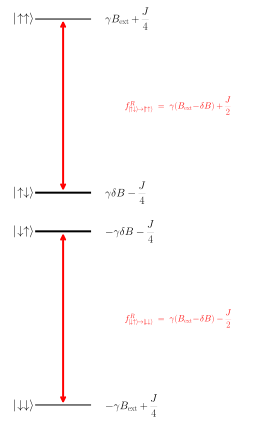

In [79]:
y_top    = 3
y_upmid  = 0.3
y_lowmid = -0.3
y_bottom = -3

x0, x1 = 0.1, 0.3

fig, ax = plt.subplots(figsize=(4,6))

ax.hlines(y_top,    x0, x1, color='black', lw=2)
ax.hlines(y_upmid,  x0, x1, color='black', lw=2)
ax.hlines(y_lowmid, x0, x1, color='black', lw=2)
ax.hlines(y_bottom, x0, x1, color='black', lw=2)

ax.annotate('', xy=(0.2, y_upmid),  xytext=(0.2, y_top),
            arrowprops=dict(arrowstyle='<->', color='red', lw=2))
ax.annotate('', xy=(0.2, y_bottom), xytext=(0.2, y_lowmid),
            arrowprops=dict(arrowstyle='<->', color='red', lw=2))

state_x = 0.02
ax.text(state_x, y_top,    r'$|\!\uparrow\uparrow\rangle$',   va='center', fontsize=12)
ax.text(state_x, y_upmid,  r'$|\!\uparrow\downarrow\rangle$', va='center', fontsize=12)
ax.text(state_x, y_lowmid, r'$|\!\downarrow\uparrow\rangle$', va='center', fontsize=12)
ax.text(state_x, y_bottom, r'$|\!\downarrow\downarrow\rangle$', va='center', fontsize=12)

energy_x = 0.35
ax.text(energy_x, y_top,    r'$\gamma B_{\mathrm{ext}}+\dfrac{J}{4}$', va='center', fontsize=11)
ax.text(energy_x, y_upmid,  r'$\gamma\delta B-\dfrac{J}{4}$',          va='center', fontsize=11)
ax.text(energy_x, y_lowmid, r'$-\gamma\delta B-\dfrac{J}{4}$',         va='center', fontsize=11)
ax.text(energy_x, y_bottom, r'$-\gamma B_{\mathrm{ext}}+\dfrac{J}{4}$',va='center', fontsize=11)

freq_x = 0.42
ax.text(freq_x, (y_top+y_upmid)/2,
        r'$f^{R}_{|\!\uparrow\downarrow\rangle\!\to|\!\uparrow\uparrow\rangle}'
        r'\;=\;\gamma(B_{\mathrm{ext}}\!-\!\delta B)+\dfrac{J}{2}$',
        color='red', ha='left', va='center', fontsize=9)

ax.text(freq_x, (y_lowmid+y_bottom)/2,
        r'$f^{R}_{|\!\downarrow\uparrow\rangle\!\to|\!\downarrow\downarrow\rangle}'
        r'\;=\;\gamma(B_{\mathrm{ext}}\!-\!\delta B)-\dfrac{J}{2}$',
        color='red', ha='left', va='center', fontsize=9)

ax.set_xlim(0,0.95)
ax.set_ylim(-3,3)
ax.axis('off')

plt.tight_layout()
plt.show()


#### **(iii)**  
Confirm your result by using **QuTiP** to evaluate the **spectrum** of the Hamiltonian in the supplementary information (S1).  *(Don’t include any time dependence.)*


---

The Hamiltonian is (Eq. S1)

$$
H = J (\vec{S}_L \cdot \vec{S}_R - 1/4) + \vec{S}_L \cdot \vec{B}_L + \vec{S}_R \cdot \vec{B}_R 
$$

where $\vec{S} = \vec{\sigma}/2$. We assume $\vec{B}_L$ and $\vec{B}_R$ are both along $\hat z$ direction, and denote $B_L = B_{ext} + \delta B$ and $B_R = B_{ext} - \delta B$.

Now I want to fix $B_{ext} = 50$, $J = 1$ and vary $\delta B$ within [0,10]:

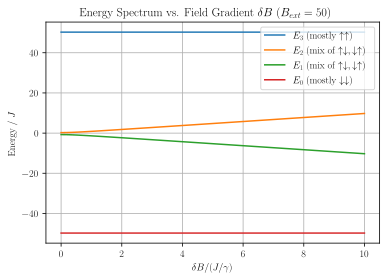

In [80]:
B_ext = 50.0
J = 1.0
gamma = 1.0

sxL = tensor(sigmax()/2, qeye(2))
syL = tensor(sigmay()/2, qeye(2))
szL = tensor(sigmaz()/2, qeye(2))
sxR = tensor(qeye(2), sigmax()/2)
syR = tensor(qeye(2), sigmay()/2)
szR = tensor(qeye(2), sigmaz()/2)

H_exch = J * (sxL*sxR + syL*syR + szL*szR)

deltaB_vec = np.linspace(0, 10 * J / gamma, 100)

energies = np.zeros((deltaB_vec.size, 4))

for idx, dB in enumerate(deltaB_vec):
    # Zeeman Hamiltonian part: gamma * (B_L * S_Lz + B_R * S_Rz)
    # B_L = B_ext + dB, B_R = B_ext - dB
    H_zeeman = gamma * ( (B_ext + dB) * szL + (B_ext - dB) * szR )
    # Total Hamiltonian
    H_total = H_exch + H_zeeman
    # Find and sort eigenvalues
    energies[idx, :] = np.sort(H_total.eigenenergies())

plt.figure(figsize=(6, 4))

plt.plot(deltaB_vec / (J/gamma), energies[:, 3] / J, label=r'$E_3$ (mostly $\uparrow\uparrow$)')
plt.plot(deltaB_vec / (J/gamma), energies[:, 2] / J, label=r'$E_2$ (mix of $\uparrow\downarrow, \downarrow\uparrow$)')
plt.plot(deltaB_vec / (J/gamma), energies[:, 1] / J, label=r'$E_1$ (mix of $\uparrow\downarrow, \downarrow\uparrow$)')
plt.plot(deltaB_vec / (J/gamma), energies[:, 0] / J, label=r'$E_0$ (mostly $\downarrow\downarrow$)')

plt.xlabel(r'$\delta B / (J/\gamma)$')
plt.ylabel(r'Energy / $J$')
plt.title(r'Energy Spectrum vs. Field Gradient $\delta B$ ($B_{ext}=50$)')
plt.legend()
plt.grid(True)

plt.autoscale(enable=True, axis='y', tight=False)

plt.show()

### **d. [5 points]**  

Once you understand Fig. 3, **Fig 4** is pretty straightforward.  However, there is something a little subtle about turning on $V_M$ to implement a **two-qubit gate**, which is that it pushes the electrons around in the field gradient and does some **unwanted $Z$-rotations** on them.

It turns out that $z$ rotations acting independently on the two qubits (i.e., a rotation on qubit 1 that does not depend on the state of qubit 2)  can be compensated later by additional single-qubit gates.

However, **rotations that are not independent** effectively constitute another two-qubit gate and **cannot be compensated** with additional single-qubit rotations.

In **Fig. S8**, the authors characterize this effect.

-   How does this measurement work?
-   In the text, they claim that $t = 204$ ns is the optimal points. How can you see this in the plots?
-   Can you speculate how this could be optimized?

---


The authors performed the Hahn‑echo sequence:

-   $\pi/2$‑pulse to rotate the Bloch vector into the $xy$‑plane;

-   Free evolution under $V_M$;

-   $\pi$‑pulse to invert the Bloch vector, clearing extra phases from non‑interaction;

-   Another $\pi/2$‑pulse to return the vector to its original orientation.

Now, referring to Fig. S8, we take the initial state $\ket{\Psi(0)}=\tfrac12\bigl(\ket{0}+\ket{1}\bigr)_L\otimes\bigl(\ket{0}+\ket{1}\bigr)_R$. After adiabatically turning on the exchange to a value $J$ for a duration $\tau_{dc}$, the state evolves to  

$$
\ket{\Psi(\tau_{dc})}=\tfrac12
\bigl(\ket{0}+e^{-\,i f^{L}_{\ket{\psi_R}=|0\rangle}\tau_{dc}}\ket{1}\bigr)_L
\otimes
\bigl(\ket{0}+e^{-\,i f^{L}_{\ket{\psi_R}=|0\rangle}\tau_{dc}}\ket{1}\bigr)_R .
$$

For $\tau_{dc}=2\pi/J$ the two‑qubit entangling operation cancels, so the left‑dot phase is independent of the right‑dot state.  The remaining single‑qubit phase depends only on $f^{L}_{\ket{\psi_R}=|0\rangle}$, and an identical argument applies to the right dot.

Experimentally we set $\tau_{dc}\approx 2\pi/J$ and evaluate the fidelity.  The specific choice $t=204\;\text{ns}$ is obtained from the intersection of the blue and red curves in Fig. S8 B & C, where the residual single‑qubit $Z$ rotations are simultaneously minimised for both qubits.



## **Problem 4-3 [18 points]** 

NV center with nuclear spin register

In this problem, we will look at the NV center and its neighboring nuclear spins as a spin register in the following paper:  

- 2014 Waldherr et al. (Wrachtrup group): *Quantum error correction in a solid-state hybrid spin register*, *Nature* **506**, 204–207 (2014).

We will investigate the first part of the paper in this PSet and continue in next week’s Pset.

### **a. [3 points]**  
In an ESR spectrum, like the one shown in 1b), the transitions of the electron spin from $m_S = 0$ to $m_S = \pm 1$ are measured. These transitions depend on the state of the nuclear register. Please label the different transitions in 1b) with the corresponding nuclear register state.

---

The energies of the +/- spin states are determined by the corresponding coefficient in the interaction hamiltonian. Its sign determines whether + state or - state will have higher energy. Here the authors have determined the coefficients from nmr studies. 

Ref: [https://elib.uni-stuttgart.de/bitstream/11682/10492/1/diss_zaiser.pdf](https://elib.uni-stuttgart.de/bitstream/11682/10492/1/diss_zaiser.pdf)

![](assets/sol4_02.png)
![](assets/sol4_03.png)

### **b. [3 points]**  
In class we learnt that the electron spin of the NV center cannot be readout in the single shot at room temperature. Here the authors do however, readout the nuclear spins via the electron spin. Qualitatively explain how this is done.

---

The readout of the nuclear spins is performed indirectly via the electron spin, leveraging the hyperfine interaction between them. The core idea is to map the nuclear spin state onto the electron spin state, which can then be read out optically (albeit not single-shot at room temperature).

1.  **State Mapping (CNOT-like interaction):** As shown in Fig. 1c of the paper, a conditional $\pi$-pulse is applied to the electron spin. This pulse is resonant only if the coupled nuclear spin (e.g., $^{13}$C) is in a specific state (e.g., $m_I = +1/2$). This effectively implements a CNOT gate where the nuclear spin is the control qubit and the electron spin is the target qubit.
   
    - If the nuclear spin is in state $\ket{0}_n$, the electron spin remains in its initial state (e.g., $\ket{0}_e$).
    - If the nuclear spin is in state $\ket{1}_n$, the electron spin is flipped (e.g., $\ket{0}_e \to \ket{1}_e$).
    An initial state $(\alpha\ket{0}_n + \beta\ket{1}_n) \otimes \ket{0}_e$ becomes $\alpha\ket{0}_n\ket{0}_e + \beta\ket{1}_n\ket{1}_e$.

2.  **Electron Spin Readout:** The state of the electron spin is then measured using the standard optical readout method for NV centers. A laser excites the NV center, and the fluorescence intensity depends on the electron spin state ($m_S=0$ fluoresces brightly, $m_S=\pm 1$ fluoresces dimly due to intersystem crossing).

3.  **Repetition and QND Nature:** Since the electron spin readout is not single-shot at room temperature, the sequence (conditional pulse + optical readout) must be repeated many times to build up a sufficient signal-to-noise ratio. Crucially, the optical readout process, while projecting (and potentially resetting) the electron spin state, is largely Quantum Non-Demolition (QND) with respect to the nuclear spin state. The nuclear spin state remains mostly undisturbed during the electron spin readout, allowing for repeated measurements to determine its state with high fidelity.

4.  **Requirements:** This method requires the hyperfine splitting (which determines the frequency difference for the conditional electron spin flip) to be larger than the relevant linewidths ($1/T_2^*$ or $1/T_2$ if using dynamical decoupling) to allow for selective addressing. A strong magnetic field helps define the nuclear spin states and reduces perturbations from the electron spin.

### **c. [3 points]**  
In Fig. 1d) the authors show their method to perform a gate between the nuclear spins. Why do they call this a non-local gate? Why are they doing this gate via the electron spin and cannot perform a two qubit gate with only nuclear spin operations? Describe how this gate works and what the purpose of the $2\pi$ rotation on the electron is.

---

**Why non-local gate?**

-   The term "non-local" is used because the gate operation entangles two nuclear spins that do not interact strongly or directly with each other. Instead, their interaction is mediated *indirectly* via their shared coupling to the central electron spin.
-   We want to perform an entangling gate between nuclear spins, but their direct dipole-dipole interaction is very weak. However, both nuclear spins have a much stronger hyperfine coupling to the NV center's electron spin.
-   By driving the electron spin conditioned on the states of the two nuclear spins, we can effectively create an interaction between the nuclear spins.
-   Mathematically, the resulting transformation on the nuclear spins cannot be written as a simple tensor product of single-qubit unitary operations ($U_1 \otimes U_2$), indicating entanglement is generated, hence it's not a "local" operation in the sense of acting independently on each qubit.

**Why via the electron spin?**

-   The direct magnetic dipole-dipole coupling between nuclear spins is extremely weak (mentioned as order $10^{-3}$ weaker than hyperfine coupling in the notes), making direct two-qubit gates impractically slow and susceptible to decoherence.
-   The hyperfine interaction between the electron spin and each nuclear spin is significantly stronger, allowing for faster and more robust gate operations mediated by the electron spin.

**How this gate works and the purpose of the $2\pi$ rotation:**

-   The gate shown in Fig. 1d utilizes the electron spin as an intermediary (ancilla) to perform a CPHASE gate between the two nuclear spins ($^{14}N$ and $^{13}C$).
-   The sequence involves applying microwave pulses to the electron spin that are resonant *only* when the nuclear spins are in a specific state (e.g., $\ket{11}$).
-   The core element is a conditional $2\pi$ rotation ($2\pi_x$) applied to the electron spin. This pulse is designed such that the electron spin undergoes a full $2\pi$ rotation *only if* both nuclear spins are in the $\ket{1}$ state (or the specific state targeted by the conditional frequency).
-   **Purpose of the $2\pi$ rotation:** While a global $2\pi$ rotation returns a spin to its original state (identity operation, $e^{-i 2\pi S_x} = I$), a *conditional* $2\pi$ rotation imparts a geometric phase (Berry phase) of $\pi$ to the system. Specifically, the state $\ket{11}_{N_1 N_2}$ acquires a phase factor of $e^{i\pi} = -1$, while other nuclear spin states ($\ket{00}, \ket{01}, \ket{10}$) do not.
-   This conditional phase flip is the definition of a CPHASE gate between the two nuclear spins:
    $\ket{00} \to \ket{00}$,
    $\ket{01} \to \ket{01}$,
    $\ket{10} \to \ket{10}$,
    $\ket{11} \to -\ket{11}$.
-   The electron spin acts as a catalyst: it mediates the interaction and ideally returns to its initial state after the gate sequence, leaving the nuclear spins entangled.

### **d. [3 points]**  
The initialization fidelity of the electron spin at room temperatures is far from ideal and typically around 70%. Nevertheless, the authors demonstrate initialization fidelities of $>$ 97% for the nuclear register. How is this achieved?

---

![](assets/sol4_04.png)

High initialization fidelity for the nuclear spins is achieved through a measurement-based protocol that leverages the electron spin as an ancilla. The basic procedure is:

1.  **Initialize Electron Spin:** Optically pump the electron spin into the $m_S=0$ state ($\ket{0}_e$). This step has imperfect fidelity (around 70%).

2.  **Polarization Transfer (SWAP/CNOT):** Transfer the polarization from the electron spin to the target nuclear spin (e.g., $^{14}N$ or $^{13}C$). This can be done using a sequence of gates equivalent to a SWAP gate, often constructed from CNOT gates (e.g., $CX_{ne}$ $CX_{en}$ $CX_{ne}$). If the electron was successfully initialized to $\ket{0}_e$, the nuclear spin is now in $\ket{0}_n$.
   
3.  **Measurement and Conditional Reset:** Measure the state of the nuclear spin (indirectly via the electron spin, as described in 4-3b).
   
    -   If the nuclear spin is measured to be in the desired state ($\ket{0}_n$), proceed.
    -   If the nuclear spin is measured to be in the undesired state ($\ket{1}_n$), apply a $\pi$-pulse to flip it to $\ket{0}_n$.
  
4.  **Repeat for all Nuclear Spins:** Repeat steps 1-3 for each nuclear spin in the register.
   
5.  **Verification (Optional but Recommended):** After attempting to initialize all nuclear spins, perform a final measurement to verify they are all in the $\ket{0}$ state. If not, repeat the entire initialization procedure from step 1.

This iterative process of initialization, transfer, measurement, and conditional correction allows the system to overcome the low initial fidelity of the electron spin polarization. By repeatedly checking and correcting the nuclear spin states, a high overall initialization fidelity ($>97\%$) can be reached for the nuclear register, albeit at the cost of increased time consumption due to the required repetitions.

### **e. [3 points]**  
Show that the gate sequence in Fig. 2d) indeed results in the W-state. (You can use QuTiP for this.)

---

Note: $\frac{\pi}{1.65} \simeq 2 \cdot \text{arccos}(\frac{1}{\sqrt{3}})$

In [81]:
def Rx(theta):
    return (-1j * theta / 2 * sigmax()).expm()


psi_111 = tensor(basis(2, 1), basis(2, 1), basis(2, 1))  # |111> state for Nuc
psi_100 = tensor(basis(2, 1), basis(2, 0), basis(2, 0))  # |100> state for Nuc
id_nuc = tensor(qeye(2), qeye(2), qeye(2))  # Identity for Nuc

ccc_gate_111 = tensor(Rx(2 * np.pi), ket2dm(psi_111)) + tensor(
    qeye(2), id_nuc - ket2dm(psi_111)
)
ccc_gate_100 = tensor(Rx(2 * np.pi), ket2dm(psi_100)) + tensor(
    qeye(2), id_nuc - ket2dm(psi_100)
)

psi_i = tensor(basis(2, 0), basis(2, 0), basis(2, 0), basis(2, 0))

# Layer 1: Single qubit rotations on 14N, 13C1, 13C2
# Using pi/1.65 ~ 2*arccos(1/sqrt(3)) as noted before
theta_N14 = np.pi / 1.65  # or use 2*np.arccos(1/np.sqrt(3))
U_layer1 = tensor(qeye(2), Rx(theta_N14), Rx(np.pi / 2), Rx(np.pi / 2))

# Layer 2: Controlled gate on NV, controls on 14N, 13C1, 13C2 (all solid)
U_layer2 = ccc_gate_111

# Layer 3: Single qubit rotations on 13C1, 13C2 and Controlled gate on NV
U_layer3_single = tensor(qeye(2), qeye(2), Rx(np.pi / 4), Rx(np.pi / 2))
U_layer3_controlled = ccc_gate_100

# Layer 4: Controlled gate on NV, controls on 14N, 13C1, 13C2 (all solid)
U_layer4 = ccc_gate_111

# Layer 5: Single qubit rotation on 13C1
U_layer5 = tensor(qeye(2), qeye(2), Rx(np.pi / 4), qeye(2))

psi_f = (
    U_layer5
    * U_layer4
    * U_layer3_controlled
    * U_layer3_single
    * U_layer2
    * U_layer1
    * psi_i
)
print("Final state psi_f:")
print(psi_f.tidyup(atol=1e-6))  # Use tidyup to remove small numerical errors

psi_W_nuc = (
    tensor(basis(2, 0), basis(2, 1), basis(2, 1))
    + tensor(basis(2, 1), basis(2, 0), basis(2, 1))
    + tensor(basis(2, 1), basis(2, 1), basis(2, 0))
) / np.sqrt(3)
psi_expected = tensor(basis(2, 0), psi_W_nuc)  # NV in |0>, Nuc in W state

overlap_val = psi_expected.overlap(psi_f)
fidelity_val = np.abs(overlap_val) ** 2
print(f"\nOverlap with expected state |0>W_nuc: {overlap_val:.4f}")
print(f"Fidelity with expected state |0>W_nuc: {fidelity_val:.4f}")

Final state psi_f:
Quantum object: dims=[[2, 2, 2, 2], [1, 1, 1, 1]], shape=(16, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.58005691]
 [ 0.        ]
 [-0.57599218]
 [-0.57599218]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]

Overlap with expected state |0>W_nuc: -1.0000+0.0000j
Fidelity with expected state |0>W_nuc: 1.0000


We can see that indeed the final state is $|\psi_f\rangle = -|0\rangle(|011\rangle + |101\rangle + |110\rangle)/\sqrt{3}$, which is a W-state for the part of nuclear spins.

### **f. [3 points]**  
Plot the ideal W-state density matrix. (You can use QuTiP for this.)

---

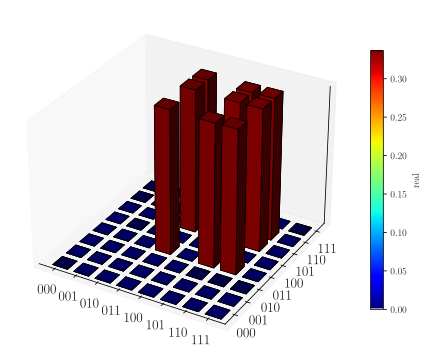

In [82]:
# Reduced density matrix for the nuclear spins part
rho_nuc = psi_f.ptrace([1,2,3])

# Use matrix_histogram() in qutip for plotting
label_list = ['000', '001', '010', '011', '100', '101', '110', '111']
plt, _ = matrix_histogram(rho_nuc, label_list, label_list)